# R4ML: Introduction and Exploratory Data Analysis

### (part I)
#####    [Alok Singh](https://github.com/aloknsingh/)

### Contents

#### &nbsp;&nbsp;  1. Introduction
##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  1.1. R4ML Brief Introduction
##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  1.2. R4ML Architecture
##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  1.3. R4ML Installation
##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  1.4. Starting the R4ML Session
#### &nbsp;&nbsp;  2. Overview of Dataset
#### &nbsp;&nbsp;  3. Load the Data
#### &nbsp;&nbsp;  4. Exploratory Data Analysis
##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  4.1. Graphical/Visual Exploratory Data Analysis
##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  4.2. Analytics Based Exploratory Data Analysis
##### &nbsp;&nbsp;  5. Summary and next steps ...


# 1. Introduction

## 1.1. R4ML Brief Introduction

[R4ML](https://github.com/SparkTC/r4ml) is an open-source, scalable Machine Learning Framework built using [Apache Spark/SparkR](https://spark.apache.org/docs/latest/sparkr.html) and [Apache SystemML](https://systemml.apache.org/).
R4ML is the hybrid of SparkR and SystemML. It’s mission is to ** make BigData R , R-like ** and to:

* Support more big data ML algorithms.
* Creating custom Algorithms.
* Support more R-like syntax

R4ML allows R scripts to invoke custom algorithms developed in Apache SystemML. R4ML integrates seamlessly with SparkR, so data scientists can use the best features of SparkR and SystemML together in the same scripts. In addition, the R4ML package provides a number of useful new R functions that simplify
common data cleaning and statistical analysis tasks.

In this set of tutorial style notebooks, we will walk through a standard example of a data-scientist work flow. This includes data precessing, data exploration, model creation, model tuning and model selection.

Let's first install and load the relevant library:

## 1.2. R4ML Architecture

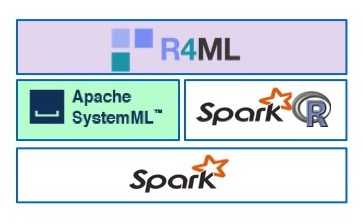



## 1.3. Installation

 Here are the steps to install R4ML. (This will only need to be done once for each user.)
 

In [5]:
# first step would be to install the R4ML in your environment
# install dependencies . This steps only need to be done once
install.packages(c("uuid", "R6", "PerformanceAnalytics"), repos = "http://cloud.r-project.org")

library("SparkR")

download.file("http://169.45.79.58/R4ML_0.8.0.tar.gz", "~/R4ML_0.8.0.tar.gz")
install.packages("~/R4ML_0.8.0.tar.gz", repos = NULL, type = "source")

Installing packages into ‘/gpfs/global_fs01/sym_shared/YPProdSpark/user/sa28-9716de71e3ac0f-9ac12ed2939a/R/libs’
(as ‘lib’ is unspecified)
Installing package into ‘/gpfs/global_fs01/sym_shared/YPProdSpark/user/sa28-9716de71e3ac0f-9ac12ed2939a/R/libs’
(as ‘lib’ is unspecified)


## 1.4. Starting the R4ML Session

Let's load the R4ML in R and start a new session


In [ ]:
# now load the R4ML library
library(R4ML)
library(SparkR)

# start the session
r4ml.session()

Launching java with spark-submit command /usr/local/src/spark21master/spark/bin/spark-submit --jars /gpfs/global_fs01/sym_shared/YPProdSpark/user/sa28-9716de71e3ac0f-9ac12ed2939a/R/libs/R4ML/java/SystemML.jar  --driver-memory "2G" sparkr-shell /gpfs/fs01/user/sa28-9716de71e3ac0f-9ac12ed2939a/notebook/tmp/RtmplQ9eoi/backend_port7a843e0d496b 


[R4ML]: Default log level will be set to 'INFO'
[R4ML]: To change call r4ml.setLogLevel(NewLevel)


## 2. Overview of Data

There are many data sets and we have decided to use the airline dataset since

 * airline dataset is not always clean and building predictive model is not straight forward. Thus we can illustrate other points about the data preparation and analysis
 * This is the free data set and reasonably sized (around 20GB and around 100M rows)
 * R4ML is shipped with a sampled version of that dataset (around 130K rows)

Here is the description of data. (you can also see the similar info by using help in R console)

##### Airline Dataset

##### Description:

     A 1% sample of the "airline" dataset available at
     http://stat-computing.org/dataexpo/2009/the-data.html This data
     originally comes from RITA (http://www.rita.dot.gov) and is in the
     public domain.

##### Usage:

     data(airline)
     
##### Format:

     A data frame with 128790 rows and 29 columns

##### Source:

     American Statistical Association

     RITA: Research and Innovative Technology Administration
     

# 3. Load the Data

Let's first load the data.

In [3]:
# read the airline dataset
airt <- airline

# testing, we just use the small dataset
airt <- airt[airt$Year >= "2007",]
airt <- airline

# testing, we just use the small dataset
airt <- airt[airt$Year >= "2007",] 
air_hf <- as.r4ml.frame(airt)

# note: in the production environment when you have the big data airline, above three lines are not scalable and should be replaced by read csv
#here is the schema
# (Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,
# CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,
# WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay)

INFO[calc num partitions]: 48 partitions
INFO[as.r4ml.frame]: repartitioning an object of size: 2448976 into 48 partitions


# 4. Exploratory Data Analysis


## 4.1. Graphical data analysis

Since R provides a very powerful visualization and exploratory data analysis, use the sampling strategy and we will sample a small data set from the distributed data frame .

Note: you can use the other exploratory analysis options here if you want to try them out.

In [4]:
airs <- r4ml.sample(air_hf, 0.1)[[1]]
rairs <- SparkR::as.data.frame(airs)

# r indicate R data frame

## 4.1.1. Histograms

The blank principle “proves that the predictive power of the features are highest if it is approximately gaussian distributed.
Let's explore this line of thinking. Lets create the histogram to see if the outputs are approximately guassian distributed and what variables are important.


Using UniqueCarrier, FlightNum, TailNum, Origin, Dest, CancellationCode, Diverted as id variables
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 3054 rows containing non-finite values (stat_bin).”

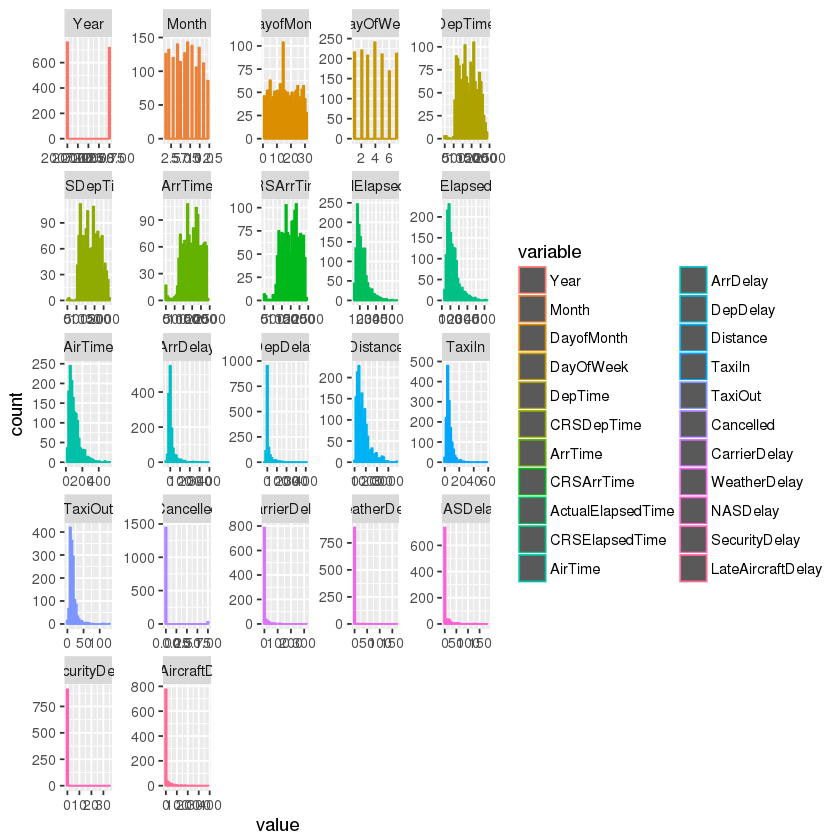

In [17]:
library(reshape2) 
library(ggplot2)
# use reshape util to create tall data for visualization
mrairs <- suppressWarnings(melt(rairs))
g<-suppressWarnings(ggplot(mrairs, aes(x=value, colour=variable))+geom_histogram()+facet_wrap(~variable, scales="free", ncol=5))
suppressWarnings(g)

* We can see from the plot, that since Year, Month, DayofMonth, DayOfWeek are almost uniform distribution and hence most likely, they won’t have much predictive power, so it would make sense to remove these variables in the subsequent analysis.

* We also notice that due to the very constant distribution, WeatherDelay, NASDelay, SecurityDelay and LateAircraftDelay won’t have much predictive power.

* Also note that there are some one sided [Power Law distribution](https://en.wikipedia.org/wiki/Power_law) e.g TaxiOut.We can use log transformation to make it approximately guassian.

Let’s prune the data for further exploration.

** Note that you can make the non bell shape curve, bell shape, using [box-cox](https://en.wikipedia.org/wiki/Power_transform) transformation. Using [SparkR](https://spark.apache.org/docs/latest/sparkr.html) and our custom machine learning features (explained in later sections), it should be very straight forward exercise **


In [9]:
# total number of columns in the dataset
total_feat <- c("Year", "Month", "DayofMonth", "DayOfWeek", "DepTime", "CRSDepTime", "ArrTime", "CRSArrTime", "UniqueCarrier", "FlightNum", "TailNum", "ActualElapsedTime", "CRSElapsedTime", "AirTime", "ArrDelay", "DepDelay", "Origin", "Dest", "Distance", "TaxiIn", "TaxiOut", "Cancelled", "CancellationCode", "Diverted", "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay")
# categorical features
# Year ,  Month ,  DayofMonth ,  DayOfWeek ,
cat_feat <- c("UniqueCarrier", "FlightNum", "TailNum", "Origin", "Dest", "CancellationCode", "Diverted")
numeric_feat <- setdiff(total_feat, cat_feat)
# these features have no predictive power as it is uniformly distributed i.e
# less information
unif_feat <- c("Year", "Month", "DayofMonth", "DayOfWeek")

# these are the constant features and we can ignore without much difference
# in output

const_feat <- c("WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay")
col2rm <- c(unif_feat, const_feat, cat_feat) 
airs_names <- names(rairs)
rairs2_names <- setdiff(airs_names, col2rm) 
rairs2 <- rairs[, rairs2_names]



## 4.1.2. Co-related features

One of the things you want to avoid is the co-related features i.e if we have one column (say c4), which is a constant multiple of another column (say c3) then either one of c4 or c3 should be used. Since geometrically n columns corresponds to n edges of n dimensional rectangle or cube and if any other edges are dependent i.e c4 and c3 are co-linear then the volume of the cube in n dimension will be zero. And this manifest it into the matrix solver error while solving system of equations)

 We will next find if there is any co-relation between the input data.

Though there are many R packages that you can use, we are going to use ** Performance Analytics ** 

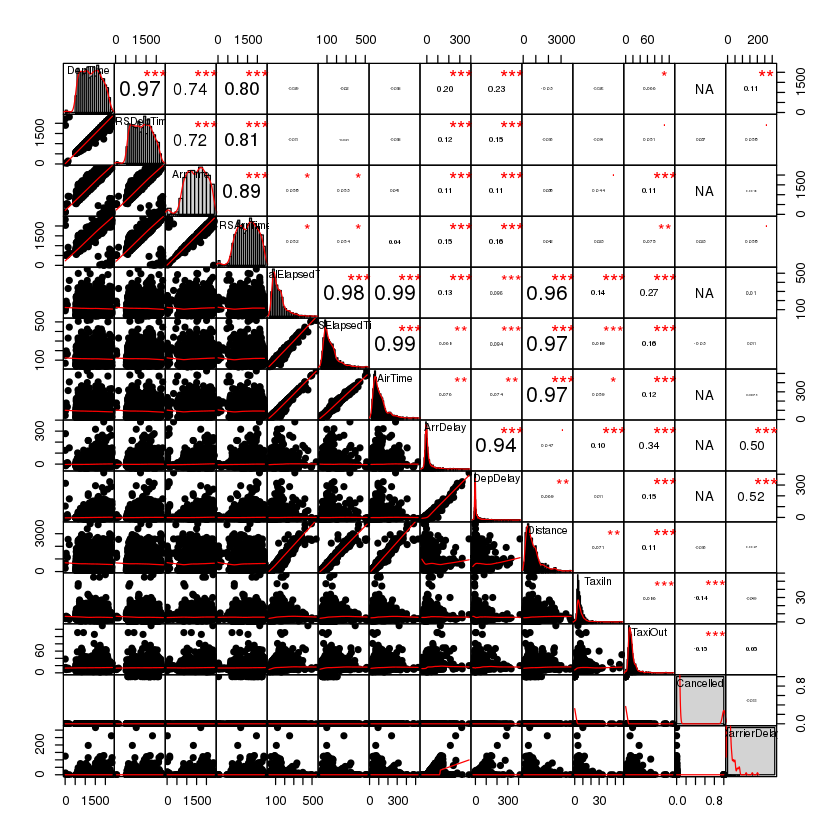

In [12]:
library(PerformanceAnalytics) 
suppressWarnings(chart.Correlation(rairs2, histogram=TRUE, pch=19)) 

## 4.2. Analytics Based Exploratory Data Analysis

This exploratory analysis can also be done in a nongraphical manner, using R4ML/SparkR.
For example, we can calculate the skewness and kurtosis to find whether a feature is close to gaussian or whether it has predictive power.
The data shows that we have the distribution for distance that is heavy tail on the right side. To get the best predictive power we might have to create a transformation so that the distribution is close to gaussian. Lets see what happens if we apply log transformation to the Distance feature..


In [14]:
library(SparkR)
library(R4ML)
#airs_sdf <- new("SparkDataFrame", airs@sdf, isCached = airs@env$isCached) #SparkR::count(airs_sdf)
dist_skew <- SparkR:::agg(airs, SparkR::skewness(log(airs$Distance))) 
SparkR::collect(dist_skew)

skewness(LOG(Distance))
-0.2231777


In [15]:
dist_kurtosis <- SparkR:::agg(airs, SparkR::kurtosis(log(airs$Distance))) 
SparkR::collect(dist_kurtosis)

kurtosis(LOG(Distance))
-0.3393868


We can see can we have a much better approximation to the guassian.

* [Skewness](https://en.wikipedia.org/wiki/Skewness) is a measure of the asymmetry of the distribution and after log transformation, we distribution for distance is close to symmetric.

* Similarly, [Kurtosis](https://en.wikipedia.org/wiki/Kurtosis) is a measure of tailedness of the distribution. note that after the log transformation tailed is almost gone.

* Similarly, one can use the [Spearman](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) and [Pearson](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) co-efficient to find the co-relations without visualizations.

In Sum, we illustrated the idea that one can use the big data analytical, exploratory data analysis to make the future decisions about predictions


## 5. Summary and next steps...

In this tutorial style notebook, we saw:

* how to install the R4ML, a scalable machine learning framework for R.
* As the first step for the data analysis, we explored how the exploratory analysis can be done on big data and how R4ML along with SparkR faciliate this features.
* In the future notebook, we will see, how to do the next steps in the data science toolkits i.e data cleaning and dimension analysis.
